In [4]:
#knn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data_path = '/Users/shangyu/Documents/GitHub/tactileGestureDetection/DATA/tactile_dataset_block.csv'
df = pd.read_csv(data_path)

# Define columns corresponding to each joint
joint_columns = {
    0: ['e0', 'de0', 'tau_J0', 'tau_ext0'],
    1: ['e1', 'de1', 'tau_J1', 'tau_ext1'],
    2: ['e2', 'de2', 'tau_J2', 'tau_ext2'],
    3: ['e3', 'de3', 'tau_J3', 'tau_ext3'],
    4: ['e4', 'de4', 'tau_J4', 'tau_ext4'],
    5: ['e5', 'de5', 'tau_J5', 'tau_ext5'],
    6: ['e6', 'de6', 'tau_J6', 'tau_ext6'],
}

# Initialize feature and label lists
X_list = []
y_list = []

# Group data by 'block_id'
grouped = df.groupby('block_id')

# Process each group
for block_id, group in grouped:
   
    # print(f"group is {group}")
    # Initialize an empty list to hold the features for this block
    block_features = []
    
    # Concatenate data for each joint
    for joint, cols in joint_columns.items():
        joint_data = group.loc[:, cols].values.flatten()  # Flatten the joint data
        block_features.extend(joint_data)  # Add the flattened data to block_features
        

    # print(f"joint_data  is {len(joint_data)}")
    # if len(joint_data) >800:
    #     print(f"block_id is {block_id}")
    #     print(f"joint_data  is {len(joint_data)}")
    #     print("有例外！")
    # Append features and the corresponding label
    X_list.append(block_features)
    print(f"X_list is {X_list}")
    y_list.append(group['touch_type'].iloc[0])  # Assuming the label is the same for all rows in the block

# print(f"X_list is {X_list}")

print(f"y_list is {y_list}")


# Convert lists to numpy arrays
X = np.array(X_list)
print(f"X is {X} and length is {len(X)}")
y = np.array(y_list)
print(f"y is {y} and length is {len(y)}")

# Encode labels
label_classes = np.unique(y)
label_map = {label: idx for idx, label in enumerate(label_classes)}
y_encoded = np.array([label_map[label] for label in y])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters grid
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train KNN classifier with the best parameters
best_knn = grid_search.best_estimator_

# Perform cross-validation on the training set
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5)

# Predict
y_pred = best_knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print predicted and true labels
print(f'Predicted labels: {y_pred}')
print(f'True labels: {y_test}')

# Display classification report
print(classification_report(y_test, y_pred, target_names=label_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_classes, yticklabels=label_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

X_list is [[2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497, -0.0735716223716735, -0.1104023472073219, 2.7841850485099684e-06, 0.0011192504687497

/Users/shangyu/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/shangyu/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: The operation <function mean at 0x7f954a1e2170> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/shangyu/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype,

Best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.89
Predicted labels: [1 2 0 2 2 1 0 2 2 3 4 0 3 1 3 2 2 4 1 2 4 4 2 2 4 0 2 0 0 4 2 3 2 2 1 0 2
 2 4 0 0 2 2 0 2 0 2 1 2 3 2 2 3 3 1 2 2 4 2 3 2 1 4 4 1 4 2 0 4 0 0 2 3 1
 0 0 3 1 2 2 0 2 2 4 4 1 2 2 3 1 2 2 2 2 2 3 2 2 3 0 2 0 1 2 2 2 4 2 4 0 3
 1 0 2 2 3 4 0 1 0 2 2 3 2 2 2 4 1 3 0 1 2 1 2 4 0 2 4 1 2 1 2 2 4 3 2 0 1
 4 2 0 1 2 0 1 3 2 3 3 1 1 2 1 3 2 2 2 1 4 0 2 2 2 0 2 2 0 4 4 2 0 3 3 2 3
 2 0 1 2 4 3 3 0 2 2 2 3 2 2 2 4 2 4 2 2 2 0 4 2 0 0 4 3 3 2 2 0 4 0 4 0 3
 4 1 3 1 0 3 2 0 3 0 2 2 2 4 3 2 0 1 0 4]
True labels: [1 2 0 2 2 1 0 2 2 3 4 0 3 1 3 2 2 4 3 2 4 4 2 2 0 0 2 0 0 4 2 3 2 2 1 0 2
 2 4 0 4 2 2 4 2 0 2 1 2 3 2 2 3 3 1 2 2 4 2 3 2 3 4 4 1 4 2 0 4 4 0 2 3 1
 0 0 3 1 2 2 0 2 2 4 4 1 2 2 3 1 2 2 2 2 2 3 2 2 3 0 2 0 1 2 2 2 4 2 4 0 3
 1 0 2 2 3 4 0 1 4 2 2 3 2 2 2 4 1 0 0 1 2 1 2 4 1 2 3 1 2 3 2 2 0 3 2 0 1
 4 2 0 1 2 0 1 3 2 3 3 1 1 2 1 3 2 2 2 1 4 4 2 2 2 3 2 2 4 3 0 2 0 3 3 2 3
 2 1 1 2 4 3 3 0 2 2 2 3 2 2 

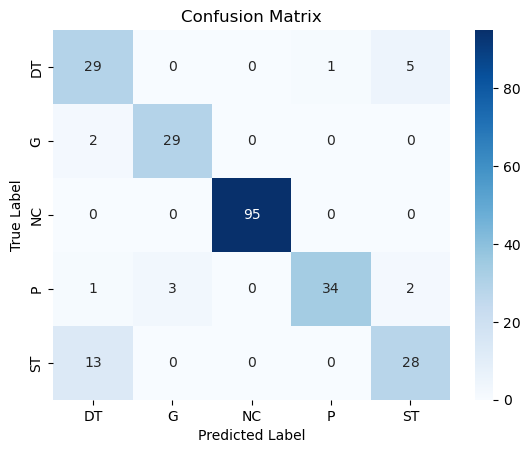

In [2]:
# KNN
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data_path = '/Users/shangyu/Documents/GitHub/tactileGestureDetection/DATA/tactile_dataset_block.csv'
df = pd.read_csv(data_path)

# Group by 'block_id' and calculate mean of each feature
grouped_df = df.groupby('block_id').apply(np.mean)

# Extract labels
labels = df.groupby('block_id')['touch_type'].first()

# Prepare feature matrix X and label vector y
X = grouped_df.drop(columns=['block_id']).values  # Drop 'block_id' from features
y = labels.values

# Encode labels
label_classes = np.unique(y)
label_map = {label: idx for idx, label in enumerate(label_classes)}
y_encoded = np.array([label_map[label] for label in y])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define hyperparameters grid
param_grid = {
    'n_neighbors': list(range(1, 21)),  # 搜索1到20范围内的邻居数
    'weights': ['uniform', 'distance']  # 搜索'weights'参数中的两种不同模式
}


# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train KNN classifier with the best parameters
best_knn = grid_search.best_estimator_

# Perform cross-validation on the training set
cv_scores = cross_val_score(best_knn,X_train,y_train,cv = 5)

# Predict
y_pred = best_knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print predicted and true labels
print(f'Predicted labels: {y_pred}')
print(f'True labels: {y_test}')

# Display classification report
print(classification_report(y_test, y_pred, target_names=label_classes))

conf_matrix = confusion_matrix(y_test,y_pred)

#plot confusion matrix using seabon
plt.figure()
sns.heatmap(conf_matrix,annot=True,fmt= 'd',cmap='Blues', xticklabels=label_classes, yticklabels=label_classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()